In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [215]:
#L1_rcus=range(16,96,8)
L1_rcus1=range(0,48)
L1_rcus2=range(48,96)
#L1_rcus=[0,1,2,8]
L1start=datetime.fromisoformat("2022-12-07 15:58:53")
L1sst_sec=1 #time for each sample
tstep_min=10;

L1_files1='../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853'
L1_files2='../menno/cs032/20221207155823_SST_HBA_ONE/20221207_155859'
#L1_files='../menno/cs032/20221203185416_SST_HBA_ONE/20221203_185446'


In [216]:
navg=tstep_min*60//L1sst_sec #10 minutes
if False:
 from sst_bst import LoadL1sst
 D=[]
 for rcu in L1_rcus1:
    D1=LoadL1sst(L1_files1,rcu)
    n1,n2=D1.shape
    n0=n1//navg
    D1=np.percentile(D1[:n0*navg].reshape([n0,navg,n2]),50,axis=1)
    #D1=np.mean(D1[:n0*navg].reshape([n0,navg,n2]),axis=1)
    D.append(D1)
 for rcu in L1_rcus2:
    D1=LoadL1sst(L1_files2,rcu)
    n1,n2=D1.shape
    n0=n1//navg
    D1=np.percentile(D1[:n0*navg].reshape([n0,navg,n2]),50,axis=1)
    #D1=np.mean(D1[:n0*navg].reshape([n0,navg,n2]),axis=1)
    D.append(D1)
 D=np.array(D)
 D=np.swapaxes(D,0,1)
 print(D.shape)
 np.save("L1_HBA",D)
else:
 D=np.load("L1_HBA.npy")
print('hours=',D.shape[0]*tstep_min/60)
L1_hour=np.arange(D.shape[0])*tstep_min/60+(15+58/60+59/60/60-24)

../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu000.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu001.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu002.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu003.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu004.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu005.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu006.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu007.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu008.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu009.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu010.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu011.dat
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu012.dat
../menno/cs032/20221207155823_SST_HBA_

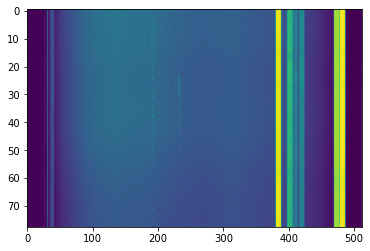

In [217]:
def P2dB(P): return 10*np.log10(P)
plt.imshow(P2dB(D[:,0,:]),aspect='auto')

In [218]:
sis=range(8*3,8*3+12); #signal inputs
START_TIME="2022-12-07 13:35:00" 
END_TIME=  "2022-12-08 07:35:00"
tstep_min=10;
filename="HBA_%s_%imin.npy"%(START_TIME,tstep_min)
D2=np.load(filename)
print(D2.shape)
L2_hour=np.arange(D2.shape[0])/60*tstep_min+(13+35/60-24)


(107, 12, 512)


In [219]:
freqs=200-np.arange(512)/512*100
freqL1=np.roll(freqs[::-1],0)
def Pnorm(P1):
    Pwr=10*np.log10(P1)
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    return Pwr


[0.07406701 0.10318971 0.03594027 0.05222471 0.04383789 0.05767195
 0.04545355 0.21755719 0.15601087 0.08508187 0.0831589  0.07908907]


(-2.0, 1.5)

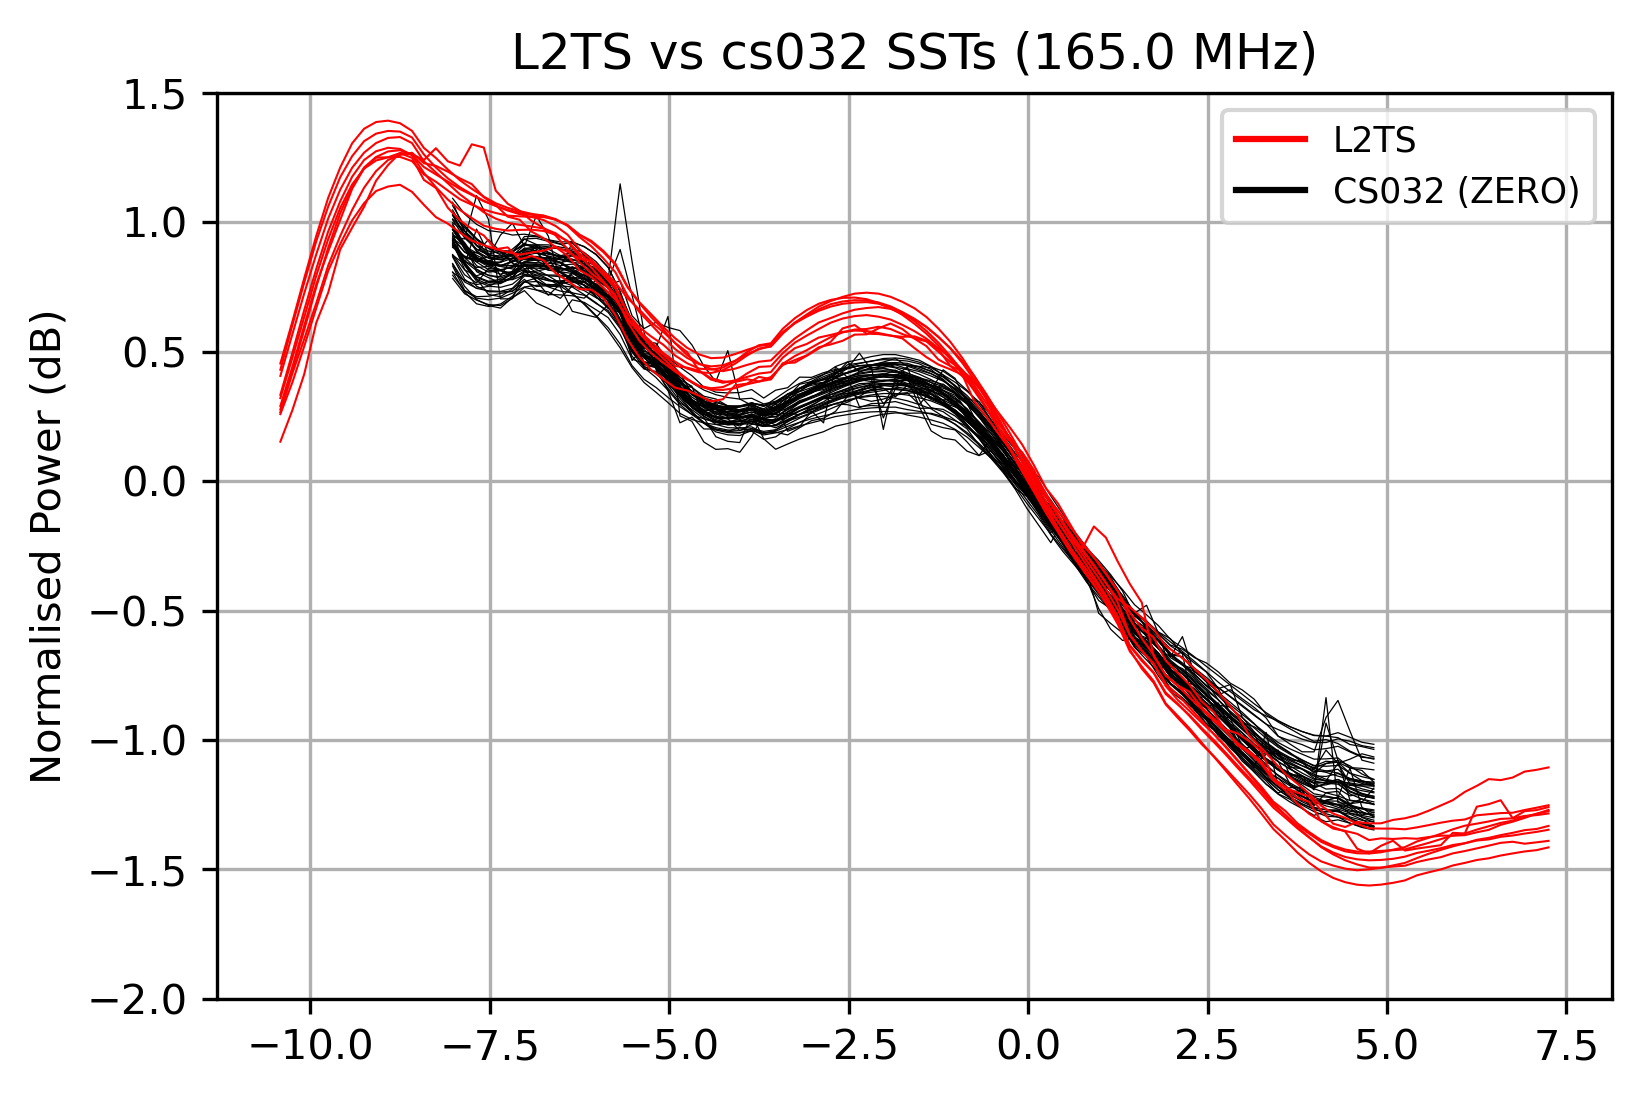

In [229]:
freq1=165;
A1cut=0.1
A2cut=0.15

i2=np.argmin(np.abs(freqs-freq1))
i1=np.argmin(np.abs(freqL1-freq1))

plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
if True:
#for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,:,i1])
    A1=np.std(Dn-np.percentile(Dn,50,axis=1)[:,np.newaxis],axis=0)
    #print(A1)
    for rcu in range(Dn.shape[1]):
        if A1[rcu]>A1cut: continue
        plt.plot(L1_hour,Dn[:,rcu],'k-',linewidth=0.3,markersize=1)


    D2n=Pnorm(D2[:,:,i2])
    A2=np.std(D2n-np.percentile(D2n,50,axis=1)[:,np.newaxis],axis=0)
#    print(A2)
    for l in range(12):
        if A2[l]>A2cut: continue
        plt.plot(L2_hour,D2n[:,l],'r-',linewidth=0.5);

plt.plot([],[],'r-',label='L2TS')
plt.plot([],[],'k-',label='CS032 (ZERO)')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small')
#plt.xlabel('Hours since 2022-11-25 00:00:00')
plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i2])
plt.grid()
plt.ylim(-2,1.5)

#plt.xlim(0,48)

Text(0.5, 0, 'Hours since 2022-12-08 00:00:00')

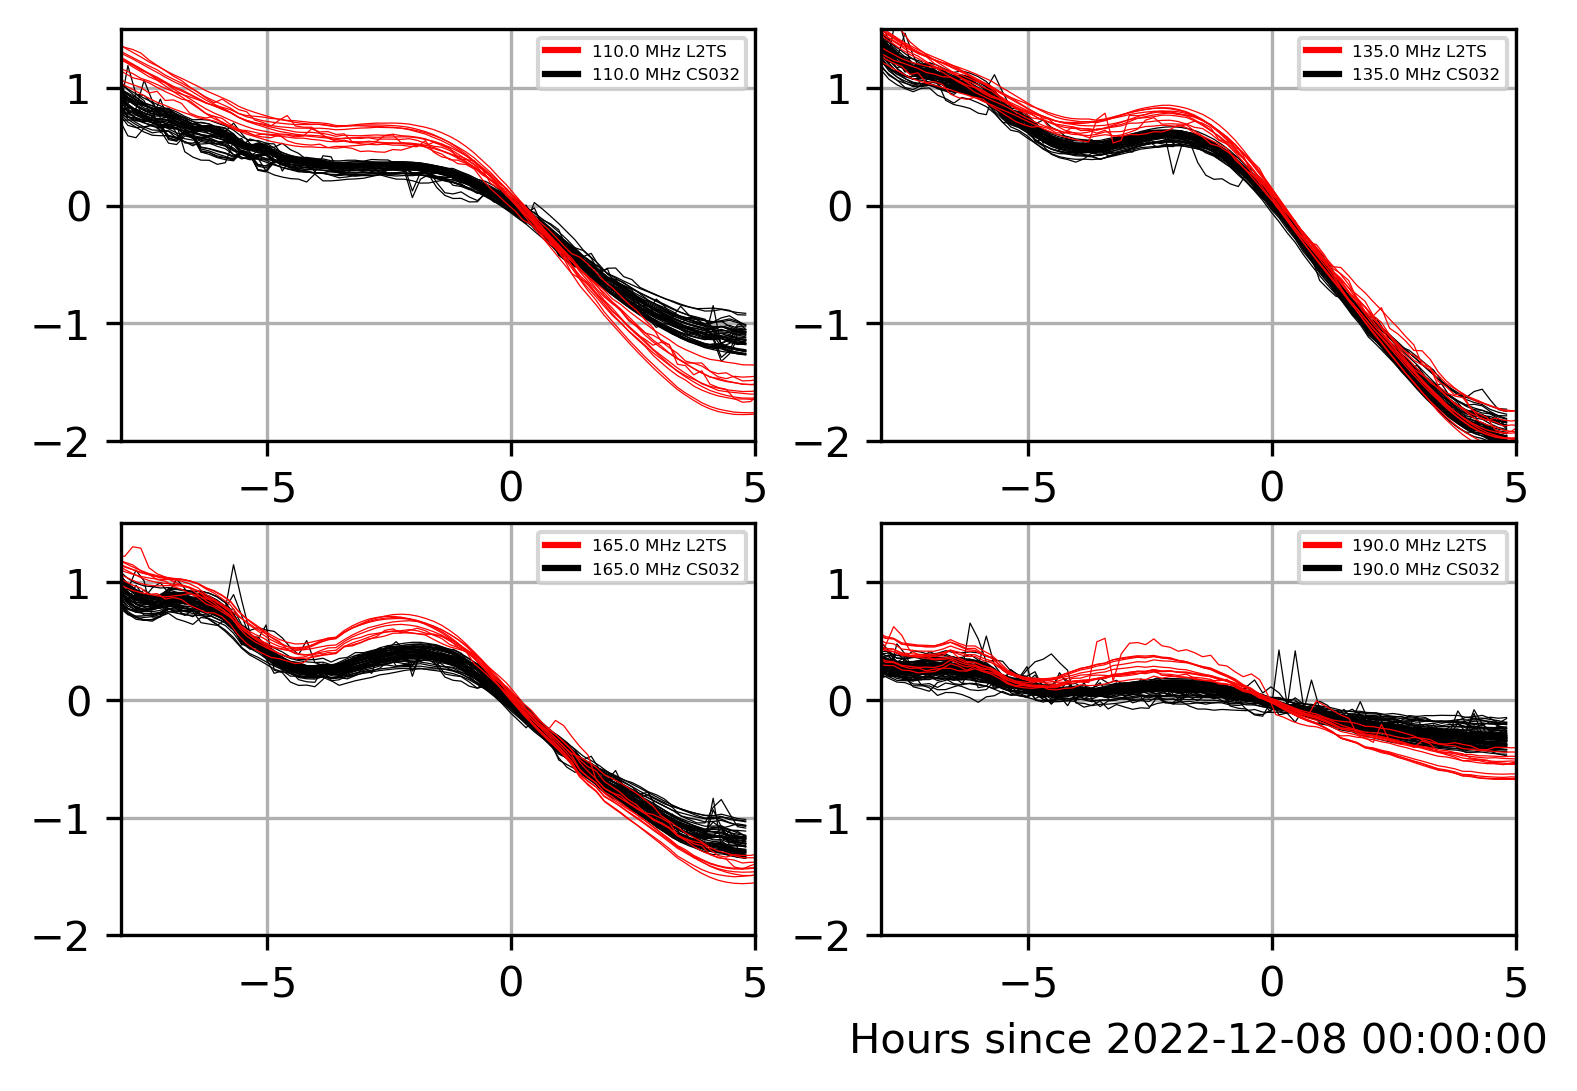

In [233]:
freqlist=[110,135,165,190]
plt.figure(dpi=300)
for x,freq1 in enumerate(freqlist):
    plt.subplot(2,2,x+1)
    i2=np.argmin(np.abs(freqs-freq1))
    i1=np.argmin(np.abs(freqL1-freq1))
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,:,i1])
    A1=np.std(Dn-np.percentile(Dn,50,axis=1)[:,np.newaxis],axis=0)

    for rcu in range(Dn.shape[1]):
        if A1[rcu]>A1cut: continue
        plt.plot(L1_hour,Dn[:,rcu],'k-',linewidth=0.3)

    D2n=Pnorm(D2[:,:,i2])
    A2=np.std(D2n-np.percentile(D2n,50,axis=1)[:,np.newaxis],axis=0)
    for l in range(12):
        if A2[l]>A2cut: continue
        plt.plot(L2_hour,D2n[:,l],'r-',linewidth=0.3);

    plt.xlim(-8,5)
    plt.ylim(-2,1.5)
#    plt.title("%.1f MHz"%freqs[i])
    plt.grid()
    plt.plot([],[],'r-',label='%.1f MHz L2TS'%freqs[i2])
    plt.plot([],[],'k-',label='%.1f MHz CS032'%freqL1[i1])
    plt.legend(fontsize=4)
#plt.ylabel('Normalised Power (dB)')
#plt.legend(fontsize='small')
plt.xlabel('Hours since 2022-12-08 00:00:00')
#plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i])


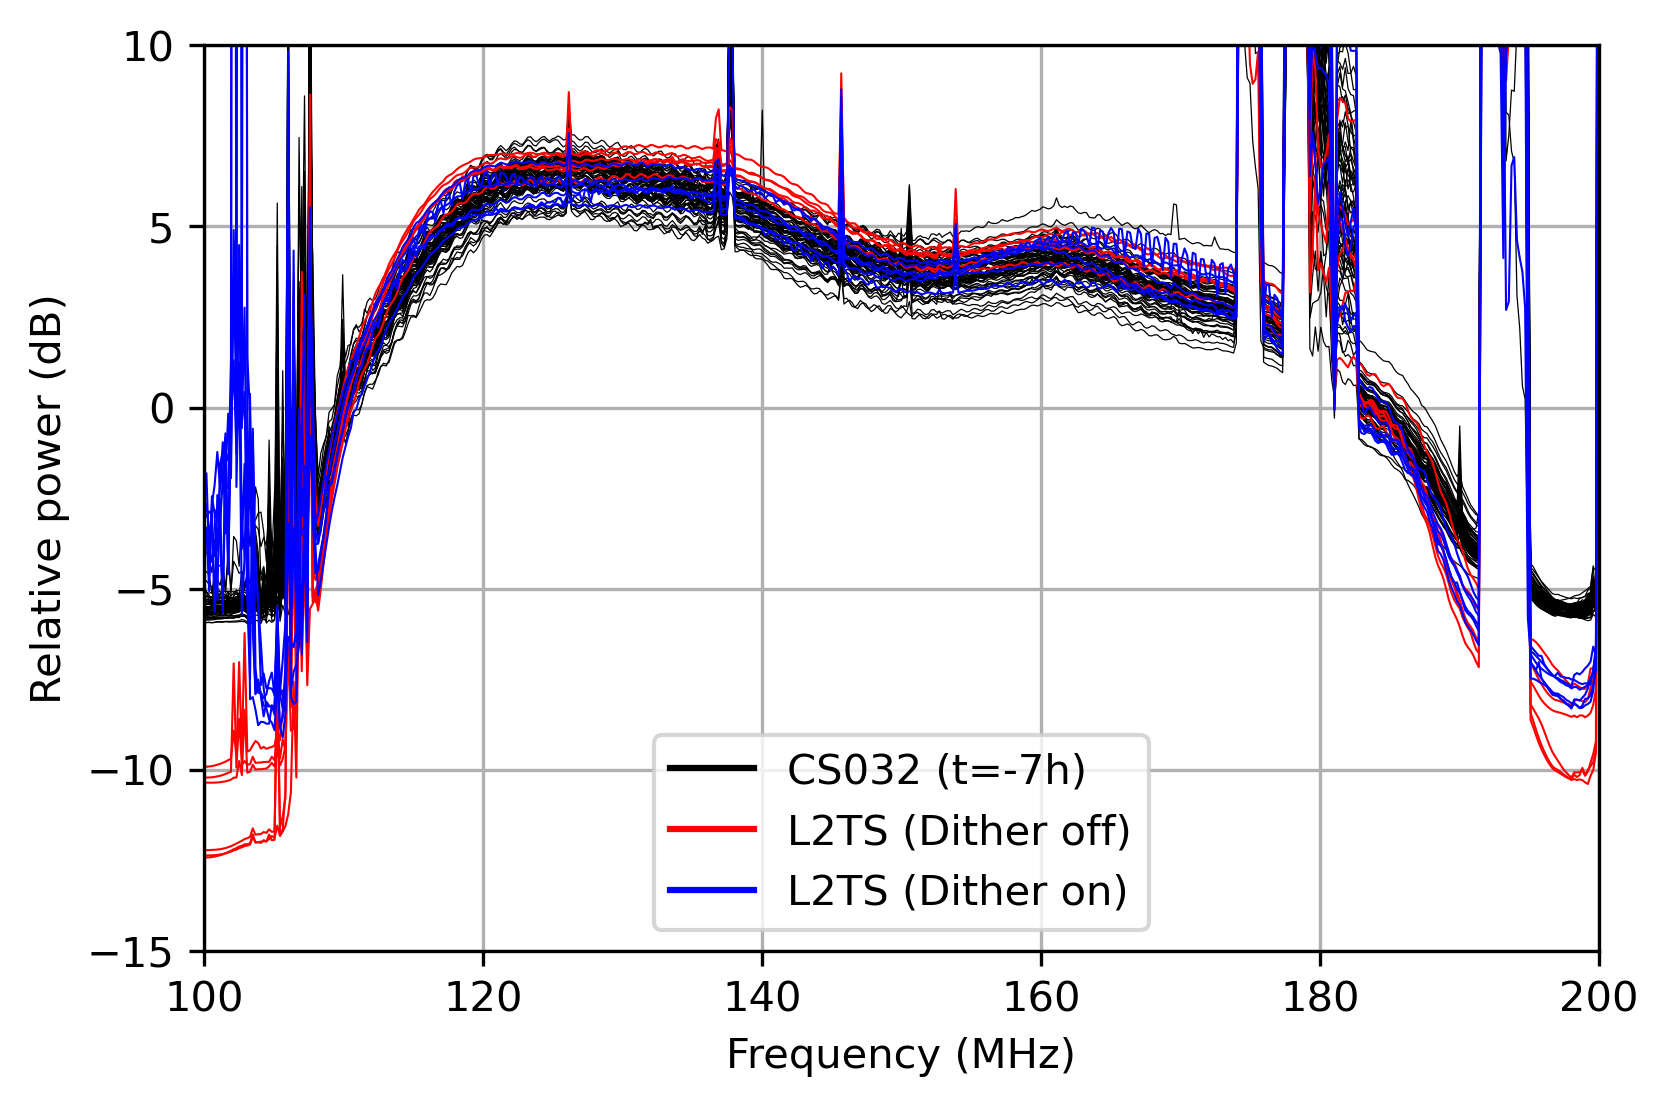

In [264]:
plt.figure(dpi=300)

#hselect=-7;
#plt.subplot(2,1,1)
#plt.xlim(100,200)
#plt.ylim(0,50)
#plt.grid()

#ihr=np.argmin(np.abs(L1_hour-hselect))
#plt.plot(freqL1,np.roll(P2dB(D[ihr,::2,:]).T,-1,axis=0)-53,'k-',linewidth=0.3);

#ihr=np.argmin(np.abs(L2_hour-hselect))
#plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
itest=np.argmin(np.abs(freqL1-122))
hselect=-7;
#plt.subplot(2,1,2)
plt.xlim(100,200)
plt.ylim(-15,10)
plt.grid()
ihr=np.argmin(np.abs(L1_hour-hselect))
for x in range(D.shape[1]):
    if P2dB(D[ihr,x,itest])-53-12.5<5: continue;
    plt.plot(freqL1,np.roll(P2dB(D[ihr,x,:]).T,-1,axis=0)-53-12.5,'k-',linewidth=0.3);

ihr=np.argmin(np.abs(L2_hour-hselect))
for x in range(6):
    scale=0 if x<3 else 2
    plt.plot(freqs,P2dB(D2[ihr,x,:]).T-53-12.5+scale,'r-',linewidth=0.5);
for x in range(6,12):
    plt.plot(freqs,P2dB(D2[ihr,x,:]).T-53-12.5+2,'b-',linewidth=0.5);
plt.ylabel("Relative power (dB)")
plt.xlabel("Frequency (MHz)")
plt.plot([],[],'k-',label='CS032 (t=%ih)'%hselect)
plt.plot([],[],'r-',label='L2TS (Dither off)')
plt.plot([],[],'b-',label='L2TS (Dither on)')
plt.legend()

Text(0.5, 0, 'Frequency (MHz)')

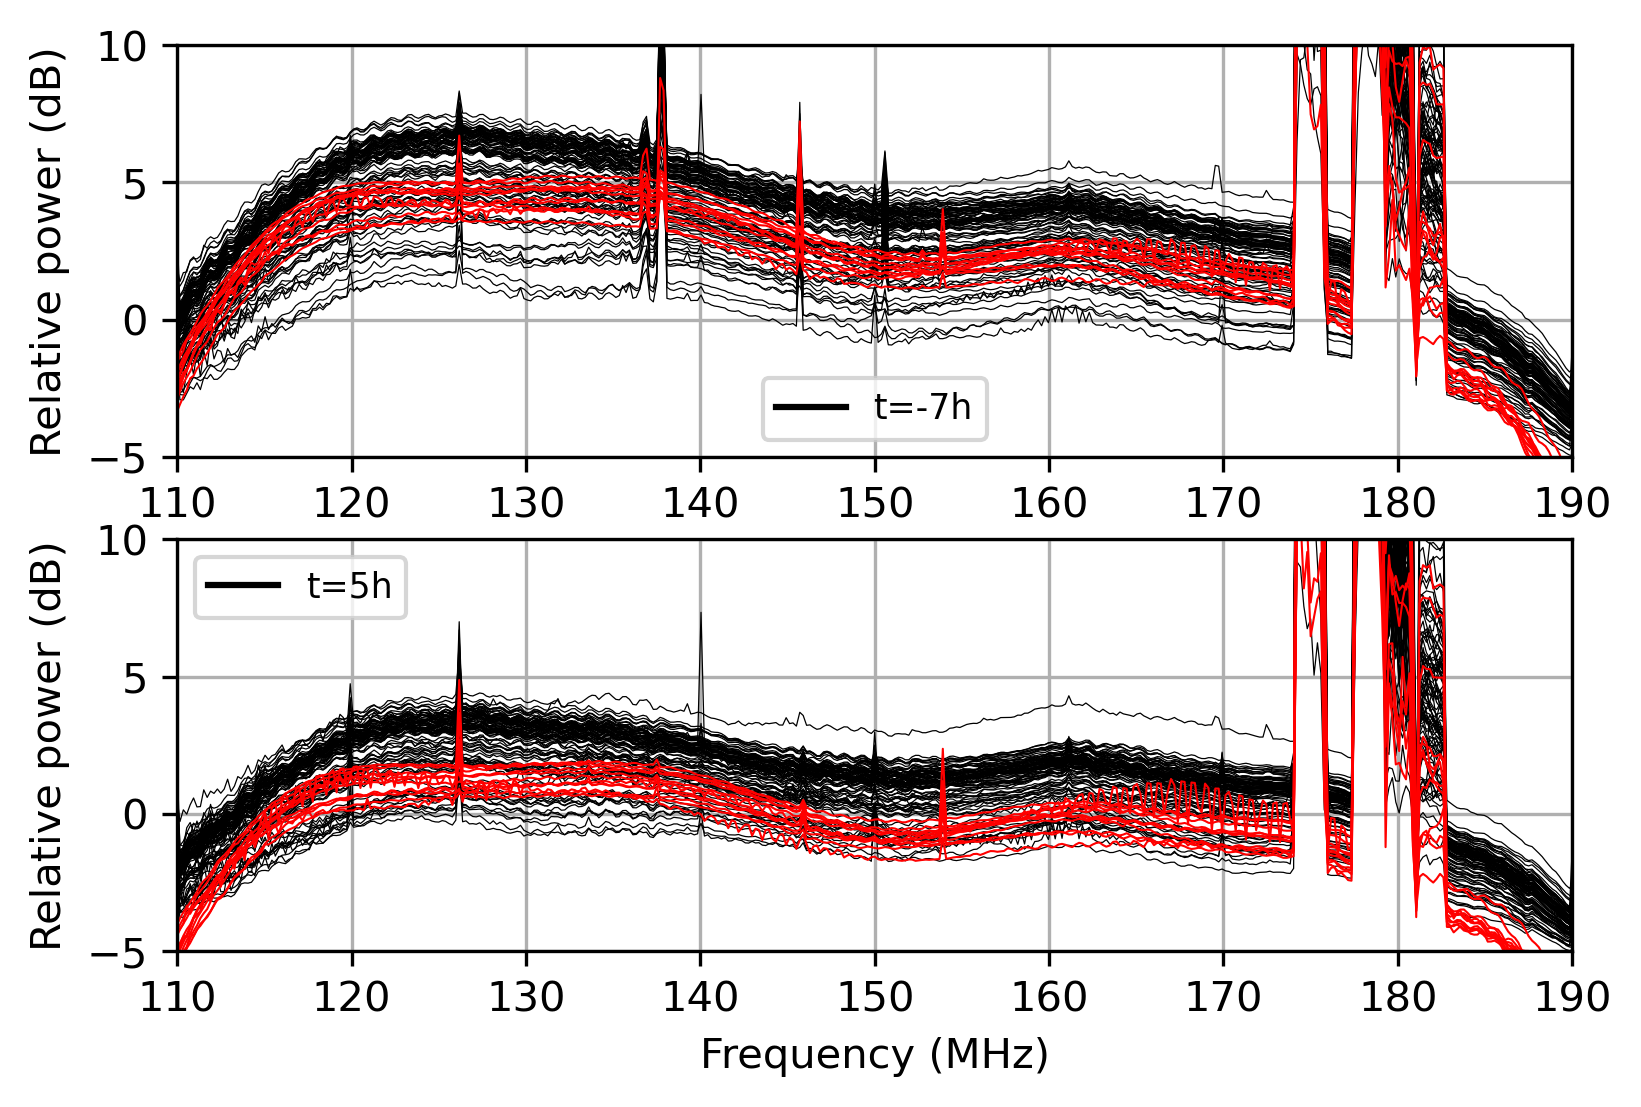

In [247]:
plt.figure(dpi=300)

hselect=[-7,5];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
    plt.xlim(110,190)
#    plt.xlim(160,165)
    #plt.ylim(-5,75)
    plt.ylim(-5,10)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqL1,np.roll(P2dB(D[ihr,::1,:]).T,-1,axis=0)-53-12.5,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    for x in range(12):
        scale=-2 if x//3==0 else 0
        plt.plot(freqs,P2dB(D2[ihr,x,:])-53-12.5+scale,'r-',linewidth=0.5);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Relative power (dB)")
plt.xlabel("Frequency (MHz)")

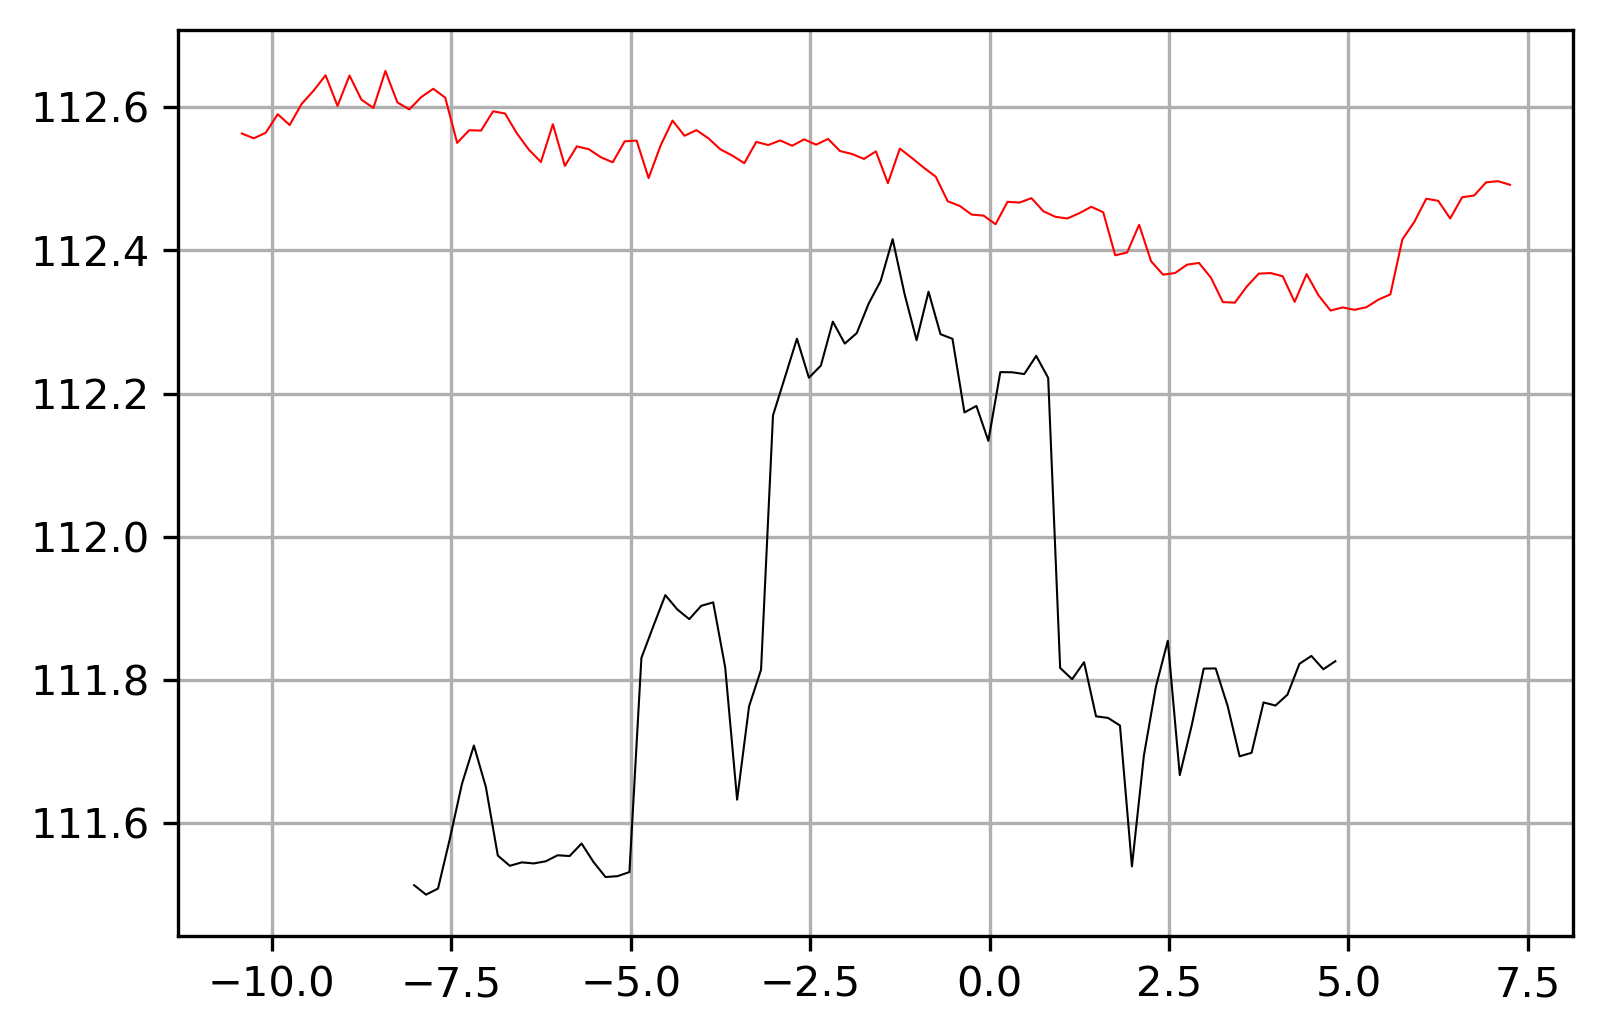

In [155]:
plt.figure(dpi=300)

P1=np.max( np.sum(D,axis=2) ,axis=1)
plt.plot(L1_hour,P2dB(P1),'k-',linewidth=0.5);

P2=np.max( np.sum(D2[:,:,:450],axis=2) ,axis=1)
#P2=np.sum(D2,axis=2)
plt.plot(L2_hour,P2dB(P2)+7,'r-',linewidth=0.5);

#plt.ylim(125,135)
#plt.xlim(38,40)
#plt.xlim(50,52)
plt.grid()

Text(0.5, 0, 'Frequency (MHz)')

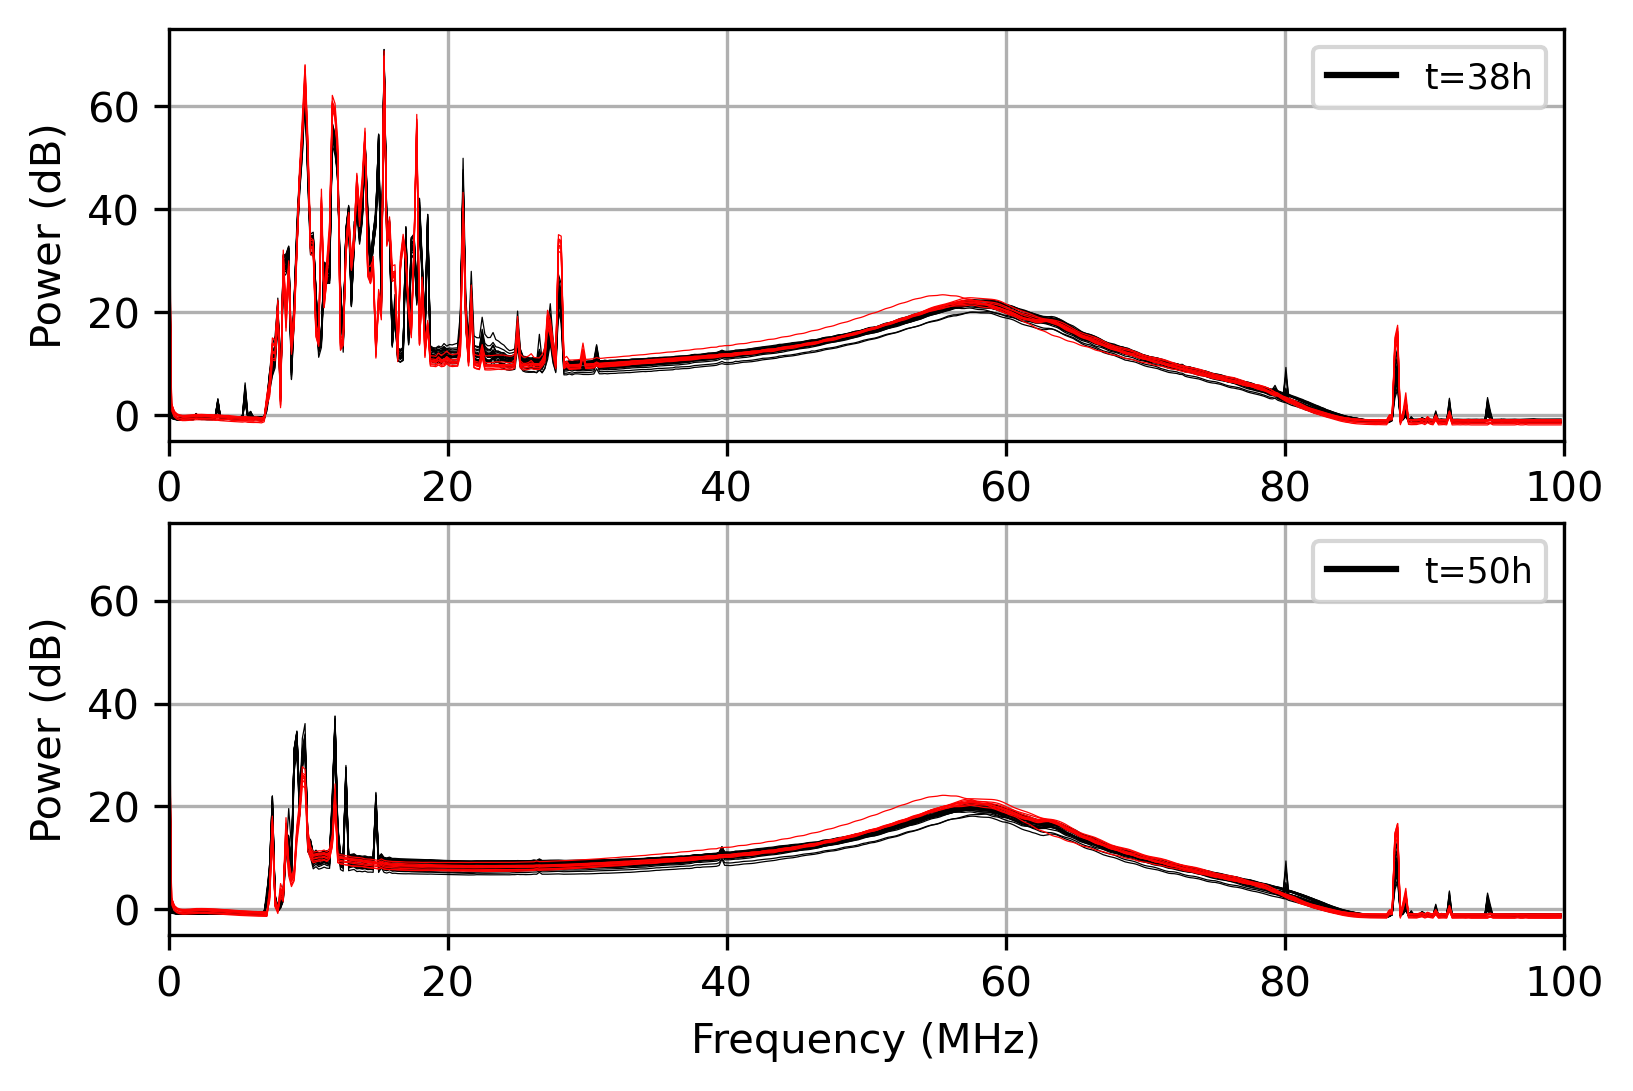

In [175]:
plt.figure(dpi=300)

hselect=[38.75,50.75];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
    plt.xlim(0,100)
    plt.ylim(-5,75)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")
